# Objective

The project was part of our AI & Data Science Master's degree at the University of Ottawa. 

Kaggle link: [Link](https://www.kaggle.com/code/mostafanofal/book-recommendation-system)

Check all the projects here: [Link](https://github.com/Mostafanofal453)

# Team Members

[Gehad Hisham](https://www.linkedin.com/in/gehad-hisham/)

[Kareem Bakli](https://www.linkedin.com/in/kareem-bakli-b48228138/)

[Kareem Khaled](https://www.linkedin.com/in/kareemwaly/)

[Mostafa Nofal](https://www.linkedin.com/in/mostafa-nofal-772625194/)

# Overview

A book recommendation system is a type of recommendation system where we recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide eBooks like google play books, open library, good Read’s, etc. recommendation systems ought to increase profit from product sales. To achieve this, recommendations need to be relevant, novel, and diverse.

![image](https://drive.google.com/uc?export=view&id=1hergj9pWG9D7UR4RzN9sRuQ5qMu8xRjS)



# Dataset

**Book Crossing Dataset**

Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

## Data Exploration

Dataset consists of 3 files:

| BX-Book-Raings                                    | BX-Books                                                     | BX-Book-Users                    |
| ------------------------------------------------- | ------------------------------------------------------------ | -------------------------------- |
| - User-ID <br>- Books ID "ISBN" <br>- Book Rating | - ISBN<br>- Book-Title <br>- Book-Author <br/>- Year of Publication <br/>- Publisher <br/>- Image-URL-S <br/>- Image-URL-M <br/>- Image-URL-L | User-ID <br>- Location <br>- Age |

## Books Description

There is no information regarding book descriptions.

We use Google API to collect descriptions of books according to their ISTPN.

Create and save a new CSV file called Book_Descriptions which we used in Content-based Recommendation System with Cosine Similarity.

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
!pip install fastapi
!pip install pydentic
!pip install pyngrok
!pip install unicorn
!pip install fastapi nest-asyncio pyngrok uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyngrok import ngrok
import nest_asyncio
import uvicorn
from inspect import Parameter
from itertools import count
from typing import Any, Dict
from urllib.request import Request
from fastapi import Body,FastAPI,Request
from matplotlib.pyplot import text
from pydantic import BaseModel, Field as PydanticField
from pydantic.fields import Field

In [ ]:
app =FastAPI()

@app.post('/')
async def home(info: Request):
    req_info = await info.json()
    print()
    intent_NAme = req_info["queryResult"]["intent"]["displayName"]
    input = req_info["queryResult"]["queryText"]

    text = "The best 5 books are:"
    if(intent_NAme=="hello" or  intent_NAme == "Default Fallback Intent" or intent_NAme=="user" ):
      print(input)
      x = [x[0] for x in get_predictions(int(input))]
      text+= ' , '.join(x)
    elif (intent_NAme=="cant understand"):
       text ="None"

    return {"fulfillmentMessages": [
      {
        "text": {
          "text": [
            text
          ]
        }
      }
    ]}

In [ ]:
# get_predictions(int(47609)).values.tolist()

[("Harry Potter and the Sorcerer's Stone (Book 1) by J. K. Rowling", 5.0),
 ('Harry Potter and the Order of the Phoenix (Book 5) by J. K. Rowling', 5.0),
 ('Griffin &amp; Sabine: An Extraordinary Correspondence by Nick Bantock',
  5.0),
 ('The Little Prince by Antoine de Saint-ExupÃ©ry', 5.0),
 ('Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling', 5.0)]

In [ ]:
#  x = [x[0] for x in get_predictions(47609)]
#  x

["Harry Potter and the Sorcerer's Stone (Book 1) by J. K. Rowling",
 'Harry Potter and the Order of the Phoenix (Book 5) by J. K. Rowling',
 'Griffin &amp; Sabine: An Extraordinary Correspondence by Nick Bantock',
 'The Little Prince by Antoine de Saint-ExupÃ©ry',
 'Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling']

In [ ]:
! ngrok authtoken "2Cg7OGHLAcRtLIdGDI8qt0lnm0T_68QR68P6xf3xDqZApKFij"

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://ceee-34-125-4-255.ngrok.io


INFO:     Started server process [59]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)



2313
INFO:     66.249.83.58:0 - "POST / HTTP/1.1" 200 OK

10314
INFO:     66.249.83.208:0 - "POST / HTTP/1.1" 200 OK

INFO:     66.249.83.38:0 - "POST / HTTP/1.1" 200 OK

INFO:     66.249.83.3:0 - "POST / HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [59]


In [ ]:
ngrok.kill()

In [ ]:
df_books=pd.read_csv('/content/drive/MyDrive/DEBI/Data Science/Books.csv')
df_ratings=pd.read_csv('/content/drive/MyDrive/DEBI/Data Science/Ratings.csv')
df_user=pd.read_csv('/content/drive/MyDrive/DEBI/Data Science/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#**1. Data Preparation**

### A) Removing the Duplicates in the Books Data Frame Before Mergeing

In [ ]:
#filling the missing values with 'Unknown'
df_books['Book-Author'].fillna('Unknown',inplace=True)

In [ ]:
# Define a function to combine to columns namely title and author
def change_title(str1,str2):
  str1 = str1 +" "+'by' +" "+str2
  return str1

In [ ]:
#shape of the dataframe before removing the duplicates
df_books.shape

(271360, 8)

In [ ]:
# Create a new column for title
df_books['new_title'] = df_books.apply(lambda x : change_title(x['Book-Title'],x['Book-Author']),axis = 1)

In [ ]:
# Get rid of duplications
df_books = df_books.drop_duplicates(subset='new_title',keep='first')

In [ ]:
#shape of the dataframe after removing the duplicates
df_books.shape

(251185, 9)

In [ ]:
#merging all the three dataset
df_merged = df_ratings.merge(df_books,how='inner',on='ISBN')
df_merged = df_merged.merge(df_user,how='inner',on='User-ID')


In [ ]:
df_merged.shape

(916933, 13)

In [ ]:
df_merged['Year-Of-Publication'].values

array([2002, 2002, 1994, ..., 1998, 1985, 2000], dtype=object)

In [ ]:
df_merged['Year-Of-Publication'] = pd.to_numeric(df_merged['Year-Of-Publication'], errors='coerce').fillna(2099, downcast = 'infer')

In [ ]:
#description of the features
df_merged.describe(include='all')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Location,Age
count,916933.00000,916933,916933.000000,916933,916933,916933.000000,916931,916933,916933,916929,916933,916933,671659.000000
unique,NaN,250075,NaN,241061,101587,NaN,16542,250074,250074,250071,250075,21418,NaN
top,NaN,0971880107,NaN,Wild Animus,Nora Roberts,NaN,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,Wild Animus by Rich Shapero,"toronto, ontario, canada",NaN
freq,NaN,2502,NaN,2502,7645,NaN,30011,2502,2502,2502,2502,13115,NaN
mean,140202.83165,NaN,2.825417,NaN,NaN,1968.353922,NaN,NaN,NaN,NaN,NaN,NaN,37.340037
std,80804.41894,NaN,3.848183,NaN,NaN,230.251189,NaN,NaN,NaN,NaN,NaN,NaN,14.073900
min,2.00000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,69697.00000,NaN,0.000000,NaN,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,28.000000
50%,140410.00000,NaN,0.000000,NaN,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000
75%,211426.00000,NaN,7.000000,NaN,NaN,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000


In [ ]:
#information of the features
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916933 entries, 0 to 916932
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              916933 non-null  int64  
 1   ISBN                 916933 non-null  object 
 2   Book-Rating          916933 non-null  int64  
 3   Book-Title           916933 non-null  object 
 4   Book-Author          916933 non-null  object 
 5   Year-Of-Publication  916933 non-null  int64  
 6   Publisher            916931 non-null  object 
 7   Image-URL-S          916933 non-null  object 
 8   Image-URL-M          916933 non-null  object 
 9   Image-URL-L          916929 non-null  object 
 10  new_title            916933 non-null  object 
 11  Location             916933 non-null  object 
 12  Age                  671659 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 97.9+ MB


#####Publication Years

In [ ]:
df_merged['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970, 1978, 1993,
       1989, 1995, 1990, 1992, 1950, 1991, 1999, 1954, 1988, 2003, 2004,
       2000, 1983, 1985, 1982, 1956, 1979, 1986, 1975,    0, 1976, 1977,
       1980, 1981, 1974, 1957, 1958, 1960, 1963, 1969, 1972, 1961, 1971,
       1953, 1968, 1973, 1967, 1962, 1937, 1959, 1955, 2005, 1945, 1965,
       1964, 1927, 2020, 2050, 1920, 1966, 1952, 1930, 1940, 1942, 1947,
       1925, 1923, 2030, 1951, 1936, 1946, 1943, 2099, 1928, 1941, 2011,
       1948, 1901, 1932, 1939, 1944, 1938, 1902, 1929, 1900, 1911, 1949,
       1926, 1933, 1922, 1897, 2026, 1906, 1806, 1935, 2006, 2037, 1921,
       2024, 2038, 1924, 1378, 2008, 1934, 1909, 1931, 1904, 1917, 2012,
       1914, 1376, 1908, 1919])

# **2.Feature Engineering**

## 1. Location

In [ ]:
# defining a function to extarct the country names
def get_country(x):
  return x.split(',')[-1]
  


In [ ]:
#applying the function the location column
df_location = df_user.copy(deep=True)
df_location['country'] = df_user['Location'].apply(get_country)

In [ ]:
df_merged['Location'] = df_merged['Location'].apply(get_country)

Extracted just the country names from the location column.

## 2. Age

### a) Creating bins for the age column.

In [ ]:
# Create age groups using age column
bins = [0,12,20,50,100]
labels = ['Kid','Teenager','Adult','Old']
df_merged['age_bins'] = pd.cut(x=df_merged['Age'], bins=bins,labels=labels)

### b) Capping Outlier



In [ ]:
# Number of outliers
outliers = sum(df_merged['Age']>90)
print(outliers)

2872


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


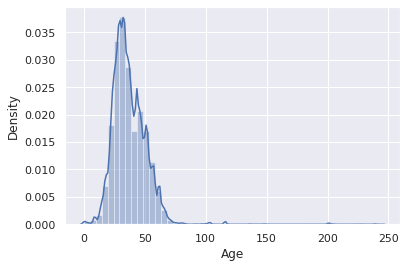

In [ ]:
# Plot Distribution of Age
sns.distplot(df_merged['Age'].dropna())
# Handling outliers by randomly replacing age >90 by values between 90 and 100
age2 = df_merged['Age'].copy()
random_age2 = np.random.randint(90,100,outliers)
age2[df_merged['Age']>90]=random_age2
df_merged['Age'] = age2

##3.Handling Missing Value

In [ ]:
# Missing Value Count Function
def show_missing(y):
    missing = y.columns[y.isnull().any()].tolist()
    return missing

def print_missing(x):
  # Missing data counts and percentage
  print('Missing Data Count')
  print(x[show_missing(x)].isnull().sum().sort_values(ascending = False))
  print('--'*20)

### a) Missing values

In [ ]:
print_missing(df_merged)

Missing Data Count
age_bins       248343
Age            245274
Image-URL-L         4
Publisher           2
dtype: int64
----------------------------------------


### b) Dealing with the missing values of age.

In [ ]:
# Null values in age column
nulls = sum(df_merged['Age'].isnull())
print('Null values in Age: ',nulls)

Null values in Age:  245274


In [ ]:
# Replacing null values
median = df_merged['Age'].median()
std = df_merged['Age'].std()
random_age = np.random.randint(median - std, median + std, size = nulls)
age = df_merged['Age'].copy()
age[pd.isnull(age)] = random_age
df_merged['Age'] = age
df_merged['Age'] = df_merged['Age'].astype(int)

In [ ]:
df_merged.shape

(916933, 14)

## 4. Calculating the Rating Count and Rating Mean for each Book-Title

In [ ]:
# Calculating the rating count and mean rating given to each book by the user.

rating_count = df_merged.groupby('Book-Title')['Book-Rating'].count().to_frame()
rating_mean = df_merged.groupby('Book-Title')['Book-Rating'].mean().to_frame()

In [ ]:
# Renaming the column names before merging them with the final dataset.

rating_count.rename(columns={'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating':'Rating-Mean'}, inplace=True)

In [ ]:
df_merged = pd.merge(df_merged, rating_count, on='Book-Title', how='inner')
df_merged = pd.merge(df_merged, rating_mean, on='Book-Title', how='inner')

In [ ]:
# rounding off the rating mean feature to 2 decimal points
df_merged['Rating-Mean'] = df_merged['Rating-Mean'].round(2)

In [ ]:
df_merged.drop(columns=['Image-URL-M','Image-URL-S','Image-URL-L'],inplace=True)

In [ ]:
df_merged.head(8)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,age_bins,Rating-Count,Rating-Mean
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,22,NaN,60,2.93
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,Adult,60,2.93
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,34,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,Kid,60,2.93
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,25,NaN,60,2.93
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,45,Adult,60,2.93
6,28266,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,36,NaN,60,2.93
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,24,Adult,60,2.93


## 5.Using IMDB Formula to calculate the Weighted Rating for our books

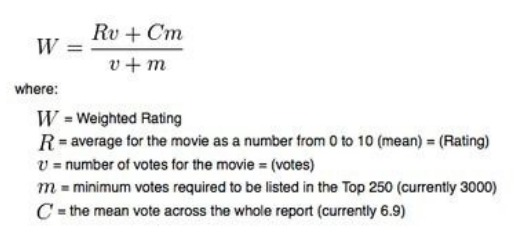

In [ ]:
# Calculating the mean vote across the whole df
C = df_merged['Rating-Mean'].mean()


In [ ]:
# Calculating the minimum votes required to be listed in the top 5%
m = rating_count.quantile(.95)[0]


In [ ]:
# IMDB formula; source: https://tutorialedge.net/python/building-imdb-top-250-clone-pandas/
def weighted_rating(x, m=m, C=C):
    v = x['Rating-Count']
    R = x['Rating-Mean']

    return (v/(v+m) * R) + (m/(m+v) * C)

## **Splitting the Dataset into Two Based on the Explicit and Implicit Ratings**

In [ ]:
df_merged_updated=df_merged[df_merged['Book-Rating']!=0]

In [ ]:
print(f" Implicit dataset has {df_merged.shape[0]-df_merged_updated.shape[0]} observations")
print(f" Explicit dataset has {df_merged_updated.shape[0]} observations")

 Implicit dataset has 576893 observations
 Explicit dataset has 340040 observations


In [ ]:
# Create relevant sub-dataset
df_top_10 = df_merged_updated.copy().loc[df_merged_updated['Rating-Count'] >= m]
df_top_10.shape

(163365, 13)

In [ ]:
df_top_10['Score'] = df_top_10.apply(weighted_rating, axis=1)
df_top_10

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,age_bins,Rating-Count,Rating-Mean,Score
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,Adult,60,2.93,2.912574
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,Kid,60,2.93,2.912574
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,25,NaN,60,2.93,2.912574
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,30,NaN,60,2.93,2.912574
13,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,37,NaN,60,2.93,2.912574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897646,142172,8807812576,7,La Fata Carabina,Daniel Pennac,1987,Universale Economica Feltrinelli,La Fata Carabina by Daniel Pennac,italy,31,NaN,12,3.75,3.287721
897648,52001,8807812576,5,La Fata Carabina,Daniel Pennac,1987,Universale Economica Feltrinelli,La Fata Carabina by Daniel Pennac,italy,35,NaN,12,3.75,3.287721
897651,73425,8807812576,7,La Fata Carabina,Daniel Pennac,1987,Universale Economica Feltrinelli,La Fata Carabina by Daniel Pennac,italy,34,NaN,12,3.75,3.287721
897653,89762,8807812576,8,La Fata Carabina,Daniel Pennac,1987,Universale Economica Feltrinelli,La Fata Carabina by Daniel Pennac,italy,37,NaN,12,3.75,3.287721


# **3. Exploratory Data Analysis**

##1. Ratings Count

### a) Explicit+Implicit Ratings

In [ ]:
rating_count=df_ratings['Book-Rating'].value_counts().reset_index().sort_values('Book-Rating',ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ratings Count')

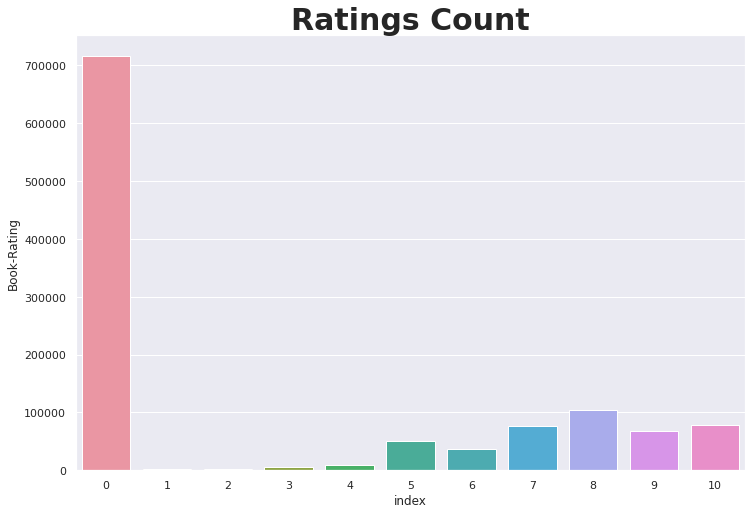

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.barplot(rating_count['index'],rating_count['Book-Rating'])
ax.set_title('Ratings Count',fontsize=30,fontweight='bold')

### **Conclusion**: The dataset with both explicit and implicit ratings is highly skewed toward the value of zero.

### b) Explicit Ratings

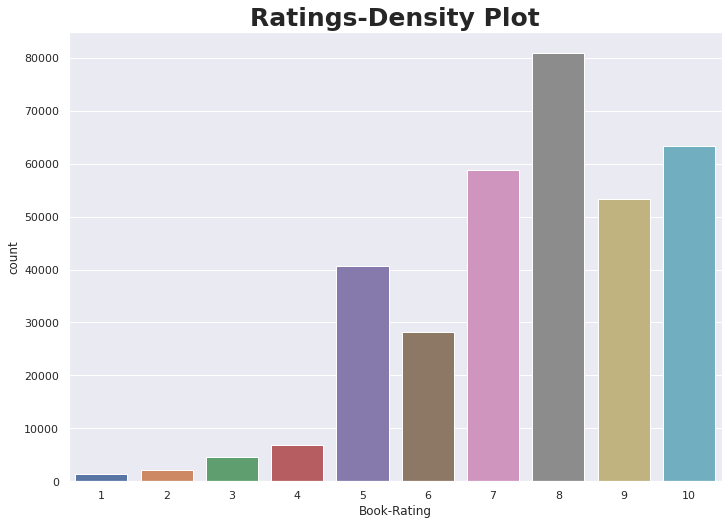

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# df_merged_updated = df_merged_updated[df_merged['Book-Rating']!=0]
sns.countplot(x='Book-Rating', data=df_merged_updated).set_title('Ratings-Density Plot', weight='bold').set_fontsize('25')

### **Conclusion**: The skewness perishes after we remove the implicit ratings.

## 2. Author V/S Ratings

In [ ]:
# ratings count per author
auth_rating=df_merged.groupby(['Book-Author'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

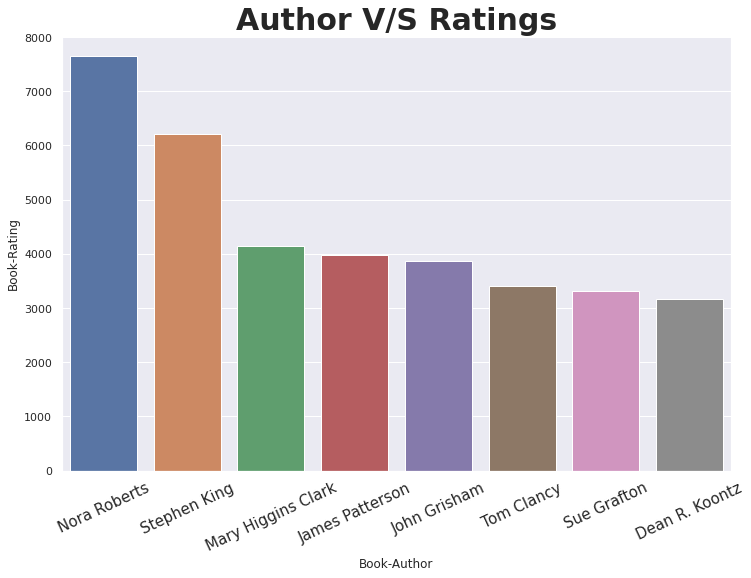

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.barplot(auth_rating[auth_rating['Book-Rating']>3000]['Book-Author'],auth_rating[auth_rating['Book-Rating']>3000]['Book-Rating'])
ax.set_title('Author V/S Ratings', fontsize=30,fontweight='bold')
plt.xticks(fontsize=15,rotation=25)

*   ### Here, we can observe, most frequently rated Authors.
*   ### Most frequently rated author is Nora Roberts, followed by Stephen King.

## 3. Book Ratings Count

In [ ]:
#Book ratings count using group by
book_rating=df_merged.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

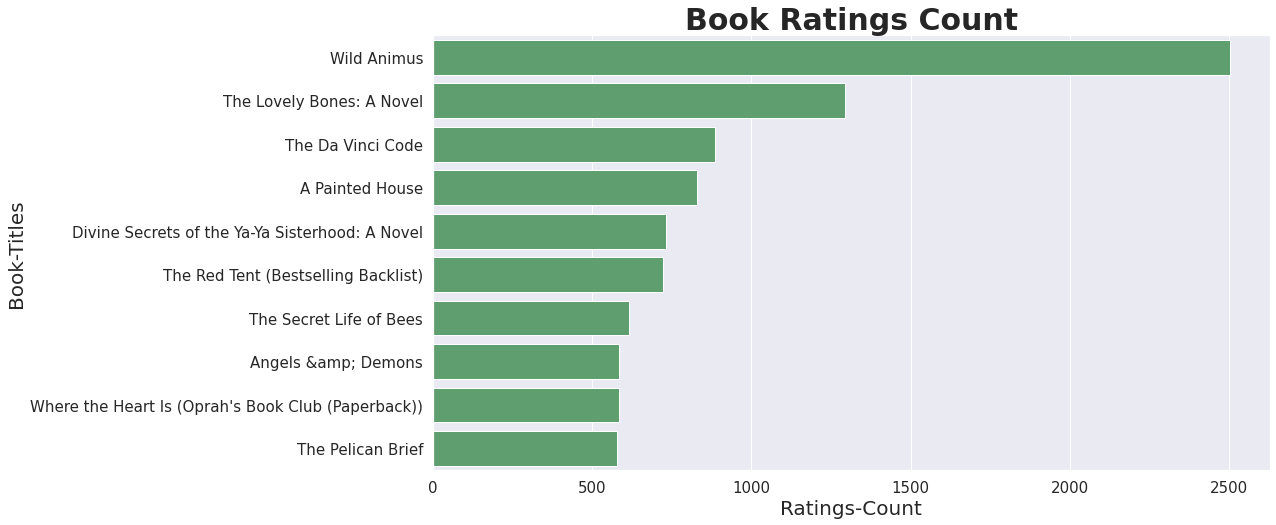

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.barplot(book_rating['Book-Rating'][:10],book_rating['Book-Title'][:10],color='g')
ax.set_title('Book Ratings Count', fontsize=30,fontweight='bold')
ax.set_xlabel('Ratings-Count',fontsize=20)
ax.set_ylabel('Book-Titles',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)




*   ### Here, we are able to observe, most frequently rated books by the users.
*   ### Most frequently rated book, happens to be Wild Animus.




## 4. Location

In [ ]:
#Identifying what % of customers are coming from different countries
df_location = pd.DataFrame(df_location.country.value_counts(normalize=True)).reset_index()
df_location.columns = ['countries','value_counts']

#Labeling countries with low customer % as other
df_location['countries'] = df_location.apply(lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],axis=1)

#Grouping the customer % from 'other' countries 
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()

In [ ]:
#Every country has now just one occurance
df_location.countries.value_counts()

 australia         1
 canada            1
 france            1
 germany           1
 italy             1
 netherlands       1
 new zealand       1
 portugal          1
 spain             1
 united kingdom    1
 usa               1
other              1
Name: countries, dtype: int64

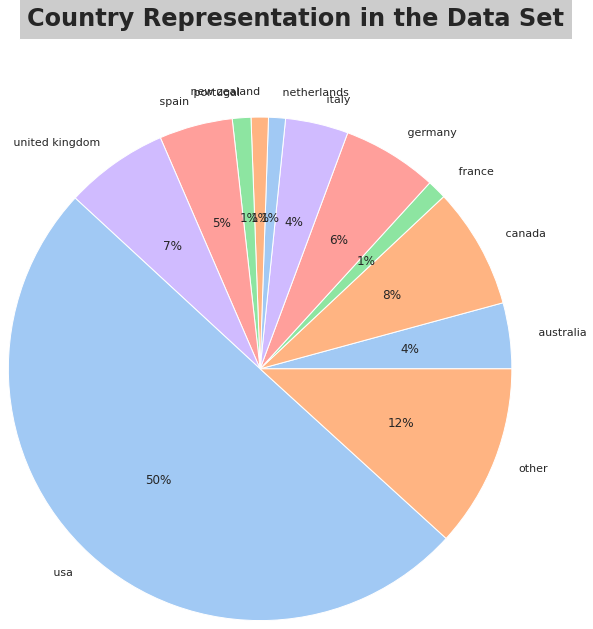

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Country Representation in the Data Set",bbox={'facecolor':'0.8', 'pad':8},fontsize=24, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(df_location['value_counts'], labels = df_location['countries'], colors = colors, autopct='%.0f%%',radius=1.4)



*   ### Most customers are from United states of America, followd by Canada, United Kingdom and Germany.
*   ### Countries with less than 1% customers are labeled as other



## 4. Age vs Rating Density


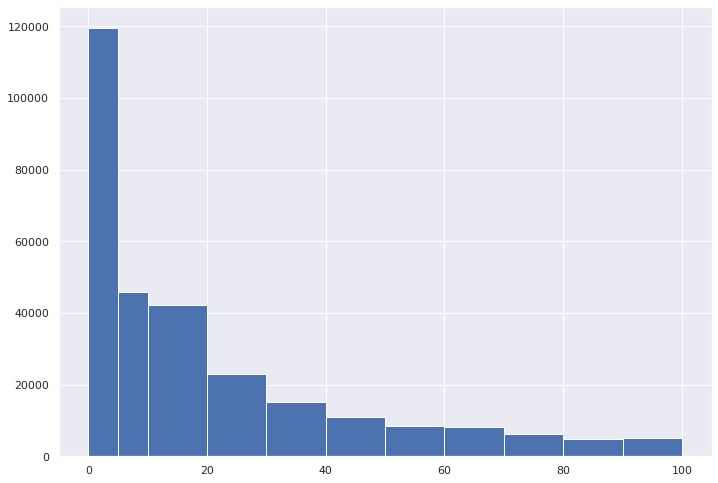

In [ ]:
# Visualizing the rating counts of the users. 
df_merged_updated['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100])

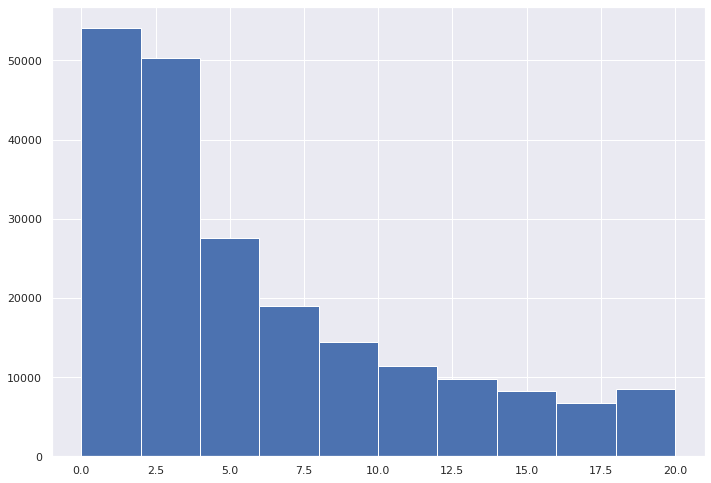

In [ ]:
# Visualizing the rating counts of the users in the range between 0 to 20. 
df_merged_updated['Rating-Count'].hist(bins=[0,2,4,6,8,10,12,14,16,18,20])

## **From this visualization it is evident that most books have been rated by 2 to 5 users only.**

## 5. Age Bin Representation

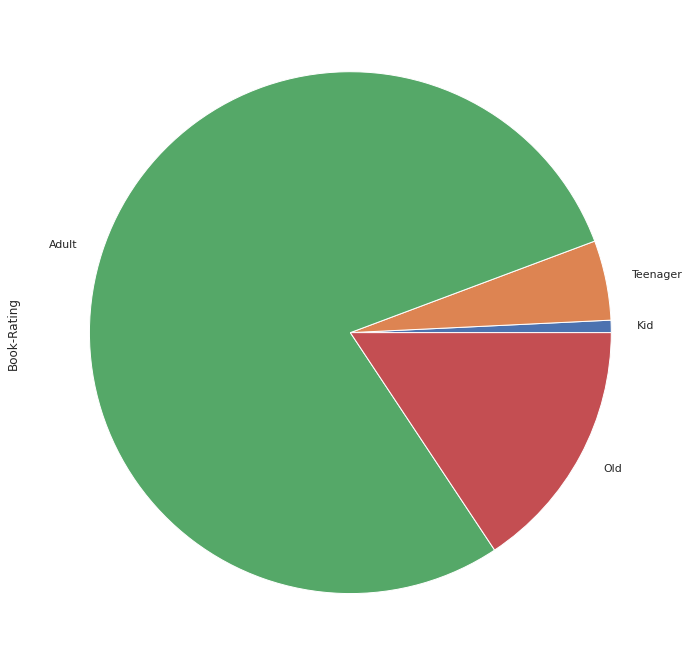

In [ ]:
# Age group that rated books the most
plt.figure(figsize=(20,12))
df_merged.groupby('age_bins')['Book-Rating'].count().plot(kind='pie')

*   ### Most customers are Adults (20-50yrs).
* ### 2nd most represented age group is for boomers (>50yrs).



In [ ]:
df_merged

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,age_bins,Rating-Count,Rating-Mean
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,22,NaN,60,2.93
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,Adult,60,2.93
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,34,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,Kid,60,2.93
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,25,NaN,60,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,Ludwig Marum: Briefe aus dem Konzentrationslag...,"germany""",27,NaN,1,5.00
916929,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,Christmas With Anne and Other Holiday Stories:...,usa,13,Teenager,1,0.00
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,Heaven (Coretta Scott King Author Award Winner...,usa,13,Teenager,1,10.00
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,singapore,15,Teenager,1,8.00


In [ ]:
# Which country rates books the most
b1 = df_merged.groupby('Location')['Book-Rating'].count().sort_values(ascending=False).head(5)
b1

Location
 usa               660618
 canada             82214
 united kingdom     29795
 germany            26024
                    21364
Name: Book-Rating, dtype: int64

In [ ]:
# Implicit ratings i.e. Book-Rating = 0
b2 = df_merged[df_merged['Book-Rating']==0].\
groupby('Location')['Book-Rating'].count().sort_values(ascending=False).head(5)

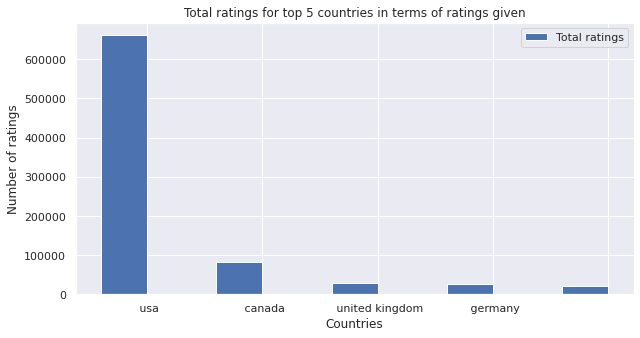

In [ ]:
# Bar plot for Rating comparison 
n= 5
X_axis = np.arange(n)
X = b1.index

plt.figure(figsize=(10,5))  
plt.bar(X_axis - 0.2, b1, 0.4, label = 'Total ratings')
#plt.bar(X_axis + 0.2, b2, 0.4, label = 'Implicit atings')
  
plt.xticks(X_axis, X)
plt.xlabel("Countries")
plt.ylabel("Number of ratings")
plt.title("Total ratings for top 5 countries in terms of ratings given")
plt.legend()
plt.show()

In [ ]:
# Most popular books for different age groups
age_bin_df = df_merged.groupby(['age_bins','Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()
age_bin_df.rename(columns={'Book-Title':'Number of times rated'},inplace=True)

### **Note**: Users from each age category can be said to have some similar book preferences, we will later use Age as a relevance to recommend books for implicit ratings.

# **4. Preparing the Data for Model Building.**


### Here the Year-Of-Publication is in object Dtype, it should ideally be in  numeric Dtype. Let us explore this feature a bit more.

## 1. Cleaning the Feature - Year of Publication

In [ ]:
# Visually inspecting this feature by observing it's unique values.
df_merged_updated['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970,    0, 1978,
       1993, 1989, 1995, 1990, 1957, 1992, 1950, 1991, 1999, 1954, 1988,
       2003, 2004, 1977, 2000, 1983, 1985, 1986, 1982, 1956, 1979, 1976,
       1981, 1980, 1974, 1958, 1960, 1963, 1969, 1971, 1973, 1972, 1961,
       1953, 1962, 1937, 1968, 1959, 1955, 2005, 1975, 1965, 1920, 1943,
       1964, 1967, 1927, 2020, 2050, 1952, 1966, 1930, 1940, 1942, 1946,
       1947, 1925, 1923, 2030, 1936, 1928, 1941, 1951, 1901, 2011, 1939,
       1945, 1932, 1902, 1929, 1911, 1949, 1926, 2026, 1906, 1806, 1933,
       1935, 1938, 2006, 2037, 1948, 2099, 2038, 1900, 1904, 1924, 1378,
       1934, 1944, 1931, 1376, 1908])

In [ ]:
# Removing all the integer Noice Values from the Dataset.
df_merged_updated = df_merged_updated[(df_merged_updated['Year-Of-Publication']<=2006)]
df_merged_updated.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,age_bins,Rating-Count,Rating-Mean
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,Kid,60,2.93


## 2. Selecting Books with Optimum Number of Ratings

* ##### Building any recommendation system requires a lot of data. Recommendations should be relevant otherwise they can cause a nuisance to the customers. 
* ##### So,set a threshold number of ratings per book in order to get optimal recommendations for our users.

In [ ]:
# counting the ratings per ISBN
books_reduce=df_merged_updated.groupby(['ISBN'])['Book-Rating'].count().reset_index().sort_values('Book-Rating',ascending=False)

In [ ]:
#Considering all the counts greater than 10
reduced_books=books_reduce[books_reduce['Book-Rating']>10]['ISBN']

In [ ]:
#merging it with the original dataset
df_merged_updated=df_merged_updated.merge(reduced_books,how='inner',left_on='ISBN',right_on='ISBN')

In [ ]:
df_merged_updated.shape

(112927, 13)

##Optimum Book reader

*   ##### We can't take every user's rating at facevalue because if the user is a novice reader with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.

* ##### Therefore as a general rule of thumb we choosing only those User's who have rated atleast 10 Books for builing the recommendation system.

In [ ]:
counts1 = df_merged_updated['User-ID'].value_counts()

df_merged_updated= df_merged_updated[df_merged_updated['User-ID'].isin(counts1[counts1 >=10].index)].reset_index()
df_merged_updated.drop(columns='index', inplace=True)

In [ ]:
df_merged_updated.shape

(51937, 13)

# **5. Building Models**

## **1. Recommendations Based upon Top 10 Books with the highest average rating (Explicit)**

In [ ]:
# top 10 rated books based on the Rating-Mean colummn
top_rated = df_merged_updated[['Book-Title', 'Rating-Mean']]
top_rated = top_rated.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()
top_rated.sort_values(by='Rating-Mean', ascending=False).head(10)

,Rating-Mean
Book-Title,
The Blue Day Book: A Lesson in Cheering Yourself Up,9.18
The Baby Book: Everything You Need to Know About Your Baby from Birth to Age Two,8.46
Die unendliche Geschichte: Von A bis Z,8.07
Free,8.02
Harry Potter y el cÃ¡liz de fuego,7.88
There's Treasure Everywhere--A Calvin and Hobbes Collection,7.88
Warchild,7.62
"Jesus Freaks: DC Talk and The Voice of the Martyrs - Stories of Those Who Stood For Jesus, the Ultimate Jesus Freaks",7.53
El Hobbit,7.48


In [ ]:
df_data = df_merged_updated.copy(deep=True)

In [ ]:
df_data['Score'] = df_merged_updated.apply(weighted_rating, axis=1)

In [ ]:
#df_Knn.drop(columns=['Book-Title','Title-Lenght','age_bins'],inplace=True)

In [ ]:
# Dropping the columns that aren't much useful for KNN recommendation system.
df_data.drop(columns=['ISBN',	'Book-Author',	'Year-Of-Publication',	'Publisher','Age','Location', 'Book-Rating', 'Rating-Count', 'Rating-Mean','Book-Title','age_bins'], inplace=True)

In [ ]:
df_data

,User-ID,new_title,Score
0,2313,Flesh Tones: A Novel by M. J. Rose,2.912574
1,10314,Flesh Tones: A Novel by M. J. Rose,2.912574
2,77480,Flesh Tones: A Novel by M. J. Rose,2.912574
3,98391,Flesh Tones: A Novel by M. J. Rose,2.912574
4,115435,Flesh Tones: A Novel by M. J. Rose,2.912574
...,...,...,...
51932,238864,Clear Your Clutter and Feng Shui Your Life by ...,4.145615
51933,179826,Whit by Iain Banks,3.494862
51934,23902,Whit by Iain Banks,3.494862
51935,106893,Whit by Iain Banks,3.494862


In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import os
import pandas as pd
import numpy as np
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict

In [ ]:
rts_gp = df_data.groupby(by=['Score']).agg({'User-ID': 'count'}).reset_index()
rts_gp.columns = ['Score', 'Count']

In [ ]:
# Set Rating Scale
reader = Reader(rating_scale=(0.5, 5))

# Load data with rating scale
data = Dataset.load_from_df(df_data[['User-ID', 'new_title', 'Score']], reader)

#Evaluation with various Algorithms available in Surprise
###k-NN Based Algorithms
####KNNBasic, KNNWithMeans and KNNWithZScore

In [ ]:
knnbasic_cv = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=5, n_jobs=5, verbose=False)

###Matrix Factorization Based Algorithms


In [ ]:
svd_cv = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=5, n_jobs=5, verbose=False)
nmf_cv = cross_validate(NMF(), data, cv=5, n_jobs=5, verbose=False)

###Other Collaborative Filtering Algorithms (Clustering)


In [ ]:
slope_cv = cross_validate(SlopeOne(), data, cv=5, n_jobs=5, verbose=False)
coclus_cv = cross_validate(CoClustering(), data, cv=5, n_jobs=5, verbose=False)

In [ ]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4), '\t', round(svdpp_cv['test_mae'].mean(), 4))
print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4), '\t', round(nmf_cv['test_mae'].mean(), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 4), '\t', round(slope_cv['test_mae'].mean(), 4))
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 4), '\t', round(coclus_cv['test_mae'].mean(), 4))
print()

Algorithm	 RMSE		 MAE

KNN Basic 	 0.2058 	 0.0455
KNN Means 	 0.3472 	 0.2543
KNN ZScore 	 0.3641 	 0.2671

SVD 		 0.3495 	 0.2534
SVDpp 		 0.2768 	 0.1903
NMF 		 0.1573 	 0.0937

SlopeOne 	 0.4856 	 0.3721
CoClustering 	 0.6719 	 0.5654



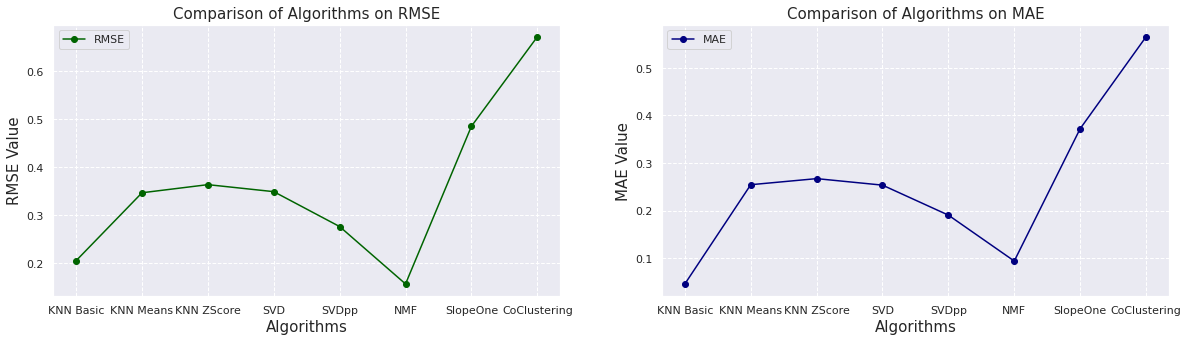

In [ ]:
x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'SVD', 'SVDpp', 'NMF', 'SlopeOne', 'CoClustering']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv, svd_cv, svdpp_cv, nmf_cv, slope_cv, coclus_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

##Evaluation Results
Winner: SVDpp (best RMSE and MAE)

In [ ]:
# trainset, testset = train_test_split(data, test_size=0.25)
# algo = NMF()
# predictions = algo.fit(trainset).test(testset)
# accuracy.rmse(predictions)

In [ ]:
trainset = data.build_full_trainset() 
algo = KNNBasic()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions_2 = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
accuracy.rmse(predictions_2)

RMSE: 0.6877


0.6876751670930621

In [ ]:
def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [ ]:
all_pred = get_all_predictions(predictions_2)
all_pred

In [ ]:
#To get top 5 reommendation
n = 5

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
len(all_pred)

2137

In [ ]:
tmp = pd.DataFrame.from_dict(all_pred)

In [ ]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [ ]:
tmp_transpose[5:10]

,0,1,2,3,4
128045,"(The Cat in the Hat by Dr. Seuss, 5)",(Harry Potter and the Sorcerer's Stone (Book 1...,(Harry Potter and the Order of the Phoenix (Bo...,(Griffin &amp; Sabine: An Extraordinary Corres...,"(Bad Business by Robert B. Parker, 5)"
188513,"(The Cat in the Hat by Dr. Seuss, 5)",(Harry Potter and the Sorcerer's Stone (Book 1...,(Harry Potter and the Order of the Phoenix (Bo...,(Griffin &amp; Sabine: An Extraordinary Corres...,"(Bad Business by Robert B. Parker, 5)"
208406,(It's A Magical World: A Calvin and Hobbes Col...,"(The Cat in the Hat by Dr. Seuss, 5)",(Harry Potter and the Sorcerer's Stone (Book 1...,(Griffin &amp; Sabine: An Extraordinary Corres...,"(Bad Business by Robert B. Parker, 5)"
240144,(It's A Magical World: A Calvin and Hobbes Col...,"(The Cat in the Hat by Dr. Seuss, 5)","(Bad Business by Robert B. Parker, 5)","(The Sinner by TESS GERRITSEN, 5)","(Warchild by Karin Lowachee, 5)"
244420,(It's A Magical World: A Calvin and Hobbes Col...,"(The Cat in the Hat by Dr. Seuss, 5)",(Harry Potter and the Sorcerer's Stone (Book 1...,(Harry Potter and the Order of the Phoenix (Bo...,(Griffin &amp; Sabine: An Extraordinary Corres...


In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

#2313 10314 52011 59059

In [ ]:
#specifying the user
user_id= 240144
results = get_predictions(user_id)
results

0    (It's A Magical World: A Calvin and Hobbes Col...
1                 (The Cat in the Hat by Dr. Seuss, 5)
2                (Bad Business by Robert B. Parker, 5)
3                    (The Sinner by TESS GERRITSEN, 5)
4                      (Warchild by Karin Lowachee, 5)
Name: 240144, dtype: object

## Error Analysis

In [ ]:
def GetTopN(allPredictions,n=10):
  global top_n
  for uid, iid, true_r, est, _ in allPredictions:
    if(est > 4.0):
      #print("assd")
      top_n[uid].append((iid, est))
      #print(est)
  for uid, user_ratings in top_n.items():
          user_ratings.sort(key=lambda x: x[1], reverse=True)
          top_n[uid] = user_ratings[:n]

  

In [ ]:
from surprise.model_selection import LeaveOneOut
    
LOOCV = LeaveOneOut(n_splits=1, random_state=1)

for trainSet, testSet in LOOCV.split(data):
    # Train model without left-out ratings
    algo.fit(trainSet)
    # Predicts ratings for left-out ratings only
    leftOutPredictions = algo.test(testSet)
    # Build predictions for all ratings not in the training set
    bigTestSet = trainSet.build_anti_testset()
    allPredictions = algo.test(bigTestSet)
    # Compute top 10 recs for each user
    topNPredicted = GetTopN(allPredictions, n=10)

In [ ]:
top_n = defaultdict(list)
topNPredicted = GetTopN(allPredictions, n=5)

In [ ]:
len(top_n)

In [ ]:
top_n

In [ ]:
def HitRate(topNPredicted, leftOutPredictions):
    hits = 0
    total = 0

 # For each left-out rating
    for leftOut in leftOutPredictions:
        userID = leftOut[0]
        leftOutbookID = leftOut[1]
        # Is it in the predicted top 10 for this user?
        hit = False
        for uid, user_ratings in topNPredicted[userID]:
            if ((leftOutbookID) == (uid)):
                hit = True
                break
        if (hit) :
            hits += 1

        total += 1

    # Compute overall precision
    return hits/total
print("\nHit Rate: ", HitRate(top_n, leftOutPredictions))

In [ ]:

def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(allPredictions , columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
top_n

In [ ]:
df

In [ ]:
worst_predictions

In [ ]:
best_predictions

## **6. Content Description Based Recommender system**

### a) Extracting Summary from Google Books API

In [ ]:
# Python's built-in module for encoding and decoding JSON data
import json
# Python's built-in module for opening and reading URLs
from urllib.request import urlopen

api = "https://www.googleapis.com/books/v1/volumes?q=isbn:"
filter = df_merged.drop_duplicates('Book-Title',keep='first')
list_isbn = list(filter['ISBN'][filter['Book-Rating']==0].unique())
list_dict= {}

* ### Google Books API has **restrictions** of number of requests. By using the following code, we have been able to circumvent those restrictions.

## ***The Below Given Code Was Once Used to Create a CSV File, With Book Descriptions***

In [ ]:

# counter=0
# def descripter(x):
#   global counter
#   try:
#     return json.load(urlopen(api + x))['items'][0]['volumeInfo']["description"]
#   except:
#     print('No-Description')
    
# import time
# j = 2000
# while j!=len(list_isbn):
#   counter +=1
#   print(counter)
#   for i in list_isbn[j:j+80]:
#     list_dict[i] = descripter(i)
#   if  counter ==2100:
#     break;
#   time.sleep(0.1)
#   j +=80 
 
  
#Exporting as CSV

# export_df = pd.DataFrame(list_dict.items(),columns=['ISBN','description'])
# export_df = export_df[~export_df['description'].isna()]

# from google.colab import files
# export_df.to_csv('/content/drive/MyDrive/DEBI/Data Science\Books_Descriptions.csv')
# files.download('/content/drive/MyDrive/DEBI/Data Science\Books_Descriptions.csv')

In [ ]:
df_descriptions = pd.read_csv('/content/drive/MyDrive/DEBI/Data Science\Books_Descriptions.csv')

In [ ]:
df_descriptions.head()

,Unnamed: 0,ISBN,description
0,3,0451407423,A high-tech submarine thriller follows Admiral...
1,4,0373290284,The Flower And The Sword by Jacqueline Navin r...
2,23,0671423886,"In late-fifteenth-century Spain, the indomitab..."
3,25,082176618X,Mountain man Smoke Jensen comes to the aid of ...
4,27,0380789108,Stephanie promises to help the ghost of her ne...


In [ ]:
df_descriptions.drop('Unnamed: 0',axis=1,inplace=True)
df_tf = df_merged[df_merged['Book-Rating']==0]
df_tf = df_tf.merge(df_descriptions,how='inner',on='ISBN')
df_tf[df_tf['Book-Rating']==0].head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean,description
0,77940,0553572490,0,Vice,Jane Feather,1996,Bantam,Vice by Jane Feather,malaysia,43,4,NaN,17,3.12,On the run since accidentally killing her elde...
1,212898,0553572490,0,Vice,Jane Feather,1996,Bantam,Vice by Jane Feather,canada,30,4,NaN,17,3.12,On the run since accidentally killing her elde...


### b) Data Pre-processing

In [ ]:
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
stopwords.words('english').extend(['\n','\t'])

In [ ]:
#Removing Stop Words and Punctuations
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
#Removing Stopwords
df_descriptions['description'] = df_descriptions['description'].apply(text_process)

In [ ]:
df_descriptions.head()

,ISBN,description
0,0451407423,hightech submarine thriller follows Admiral Mi...
1,0373290284,Flower Sword Jacqueline Navin released Jul 24 ...
2,0671423886,latefifteenthcentury Spain indomitable passion...
3,082176618X,Mountain man Smoke Jensen comes aid sharpshoot...
4,0380789108,Stephanie promises help ghost new homes former...


In [ ]:
nltk.download('wordnet')
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

def lemma(text):    
    '''a function which stems each word in the given text'''
    text = [wnl.lemmatize(word) for word in text.split()]
    return " ".join(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import nltk
nltk.download('omw-1.4')
  

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df_descriptions['description'] = df_descriptions['description'].apply(lemma)

### c) Vectorizing The Data

In [ ]:
tfidf = TfidfVectorizer(min_df=5)
tfidf_mat = tfidf.fit_transform(df_descriptions['description'])
tfidf_mat

<7021x6443 sparse matrix of type '<class 'numpy.float64'>'
	with 152705 stored elements in Compressed Sparse Row format>

In [ ]:
# Change chunk_size to control resource consumption and speed
# Higher chunk_size means more memory/RAM needed but also faster 
chunk_size = 500 
matrix_len = tfidf_mat.shape[0] # Not sparse numpy.ndarray

def similarity_cosine_by_chunk(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=tfidf_mat[start:end], Y=tfidf_mat) # scikit-learn function

for chunk_start in range(0, matrix_len, chunk_size):
    cosine_similarity_chunk = similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
    # Handle cosine_similarity_chunk  ( Write it to file_timestamp and close the file )
    # Do not open the same file again or you may end up with out of memory after few chunks 

In [ ]:
cosine_similarity_chunk = cosine_similarity_chunk.transpose()
indices = pd.Series(df_descriptions['ISBN'])

In [ ]:
def recommendations(ISBN,cosine_sim = cosine_similarity_chunk ):
  try:
    index = indices[indices == ISBN].index[0]
    similarity_scores = pd.Series(cosine_similarity_chunk[index]).sort_values(ascending=False)
    top_10_books = list(similarity_scores.iloc[1:11].index)
    recommended_books_ISBN = [df_tf[df_tf['ISBN']==df_descriptions.iloc[list(df_descriptions.index)[i]]['ISBN']]['Book-Title'].to_list()[0] for i in top_10_books]
    return recommended_books_ISBN

  except:
    print('The Book Is not Indexed')

In [ ]:
df_tf[df_tf['Book-Title']=="Miss Julia Takes over"].head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean,description


In [ ]:
df_tf

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean,description
0,77940,0553572490,0,Vice,Jane Feather,1996,Bantam,Vice by Jane Feather,malaysia,43,4,NaN,17,3.12,On the run since accidentally killing her elde...
1,212898,0553572490,0,Vice,Jane Feather,1996,Bantam,Vice by Jane Feather,canada,30,4,NaN,17,3.12,On the run since accidentally killing her elde...
2,242824,0553572490,0,Vice,Jane Feather,1996,Bantam,Vice by Jane Feather,usa,21,4,Adult,17,3.12,On the run since accidentally killing her elde...
3,26544,0553572490,0,Vice,Jane Feather,1996,Bantam,Vice by Jane Feather,usa,37,4,Adult,17,3.12,On the run since accidentally killing her elde...
4,101209,0553572490,0,Vice,Jane Feather,1996,Bantam,Vice by Jane Feather,usa,44,4,Adult,17,3.12,On the run since accidentally killing her elde...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20073,267179,0749322179,0,Angels Weep,Wilbur A. Smith,1995,Reed International Books,Angels Weep by Wilbur A. Smith,australia,36,11,NaN,1,0.00,"At the dawn of a new century, an adventurer an..."
20074,270442,0395634148,0,Alma: A Novel,Gordon Burn,1992,Houghton Mifflin,Alma: A Novel by Gordon Burn,usa,44,13,NaN,1,0.00,"Alma Cogan, one of Britain's biggest pop stars..."
20075,271026,0538706171,0,Passport : An Introduction to Travel and Tourism,Howell,1992,Delmar Learning,Passport : An Introduction to Travel and Touri...,singapore,23,48,NaN,1,0.00,Passport: An Introduction to Travel and Touris...
20076,272470,071800051X,0,He Did This Just For You New Testament With Re...,Max Lucado,2001,Nelson Bibles,He Did This Just For You New Testament With Re...,usa,29,71,Adult,1,0.00,4-page article by Max Lucado reviews the plan ...


* ## For a user, say **User-ID: 6543** who has bought **Miss Julia Takes over)** and has left no rating, based on the content of this book, we can recommend the following titles.

In [ ]:
#Recommendations based on -> 0749322179: Died in the Wool
recommendations('0749322179')   

['Waltz in Time (An Avon Romantic Treasure)',
 'Pressure Points',
 'Dead Duck (Sam and Hollis Mystery)',
 'Burn Factor',
 'MARRANOS',
 '21st Century Guide to Increasing Your Reading Speed (21st Century Reference)',
 'Barracuda Final Bearing',
 'In the Midnight Hour (Haunting Hearts)',
 "The Year's Best Horror Stories: Series XIV",
 'Most Wanted']

In [ ]:
#Recommendations based on ->0142000892: Miss Julia Takes over
recommendations('2211021662') 

['Sleep My Child, Forever (Onyx True Crime)',
 'M. C. Higgins, the Great',
 'Burn Factor',
 'Dead Duck (Sam and Hollis Mystery)',
 "The Year's Best Horror Stories: Series XIV",
 'Roofworld',
 'Pressure Points',
 'Most Wanted',
 'High - Society Bachelor (Harlequin American Romance, No. 908)',
 'In the Midnight Hour (Haunting Hearts)']

In [ ]:
#Similar Recommendations:
[i for i in recommendations('2211021662')  if i in recommendations('0749322179')]

['Burn Factor',
 'Dead Duck (Sam and Hollis Mystery)',
 "The Year's Best Horror Stories: Series XIV",
 'Pressure Points',
 'Most Wanted',
 'In the Midnight Hour (Haunting Hearts)']